<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/statistical_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)



2.4.1


In [2]:

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

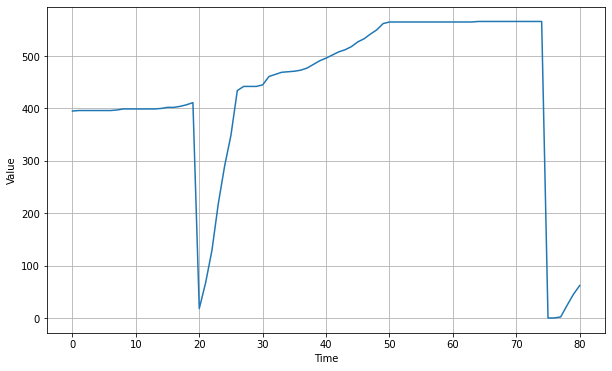

In [4]:
import csv
time_step = []
temps = []

with open('/content/ευδαπ_dataset_527085.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

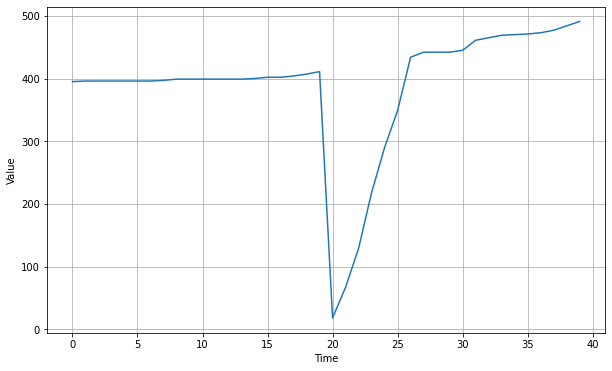

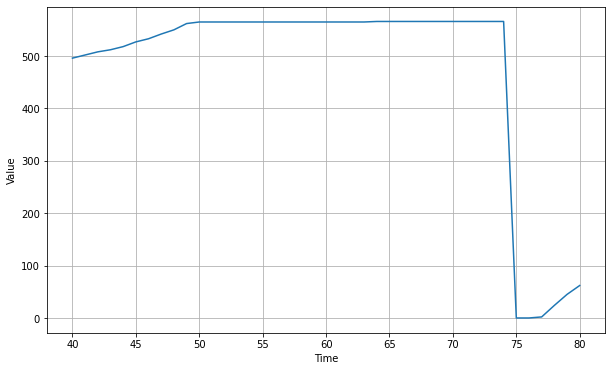

In [5]:
split_time = 40
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

Naive Forecast

In [6]:
naive_forecast = series[split_time - 1:-1]

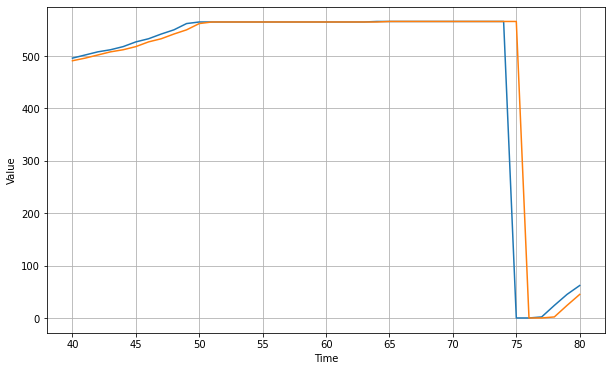

In [7]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

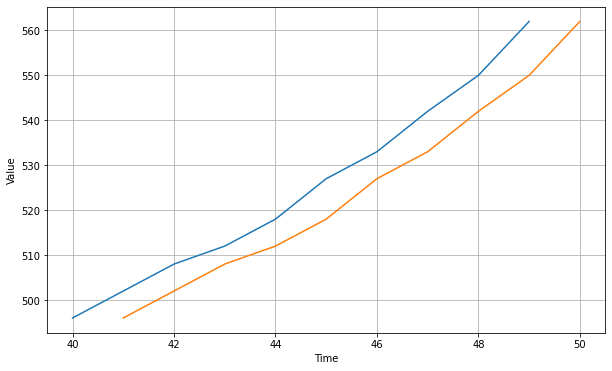

In [8]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=10)
plot_series(time_valid, naive_forecast, start=1, end=11)

compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [9]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

7857.048780487805
17.146341463414632


moving average

In [10]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

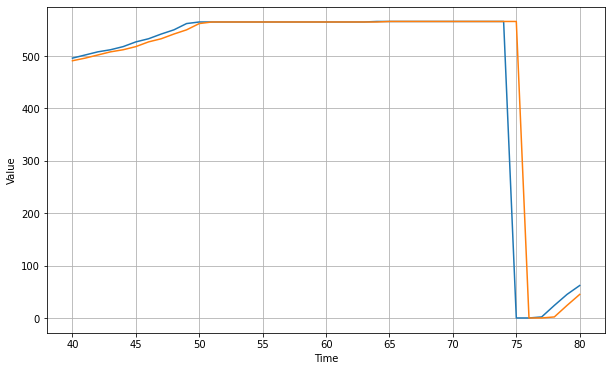

In [11]:
moving_avg = moving_average_forecast(series, 1)[split_time - 1:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [12]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

7857.048780487805
17.146341463414632


 differencing

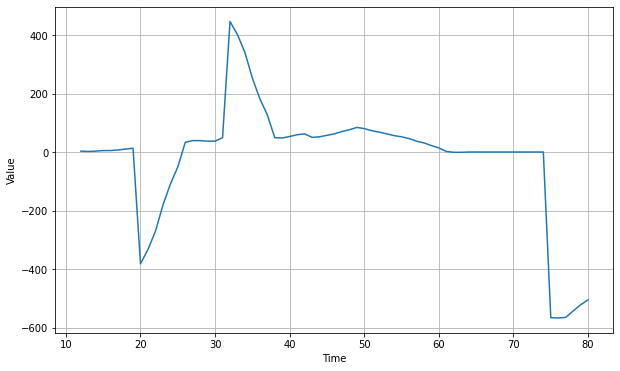

In [13]:
diff_series = (series[12:] - series[:-12])
diff_time = time[12:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

moving average


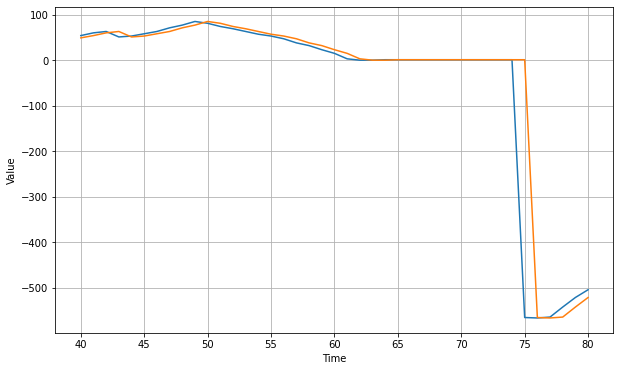

In [14]:
diff_moving_avg = moving_average_forecast(diff_series, 1)[split_time - 12 - 1:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 12:])
plot_series(time_valid, diff_moving_avg)
plt.show()

bring back the trend and seasonality

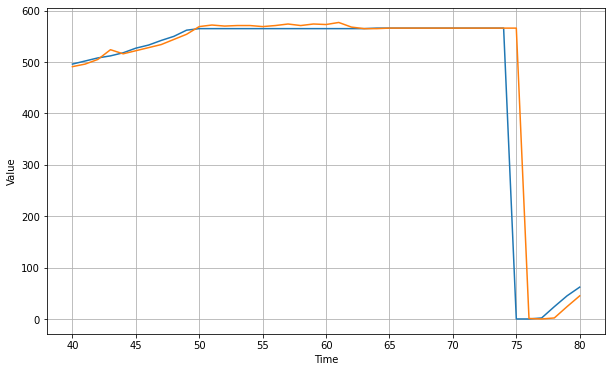

In [15]:
diff_moving_avg_plus_past = series[split_time - 12:-12] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [16]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

7869.195121951219
18.902439024390244


 remove some of the noise from past values

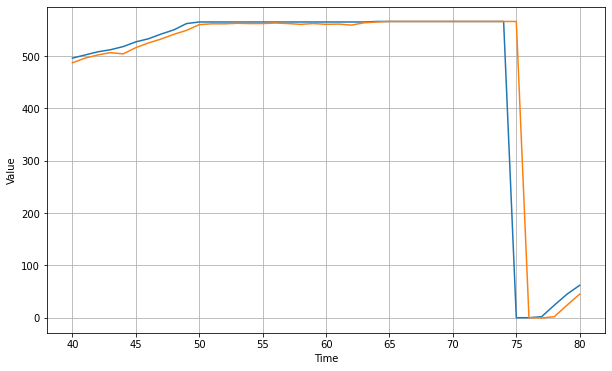

In [17]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 14:-12], 2) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [18]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

7869.841463414634
18.75609756097561


In [19]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored